Загрузим данные из набора Forest Fires о лесных пожарах в Португалии. Задача состоит в том, чтобы с помощью линейной регрессии научиться предсказывать координату area (площадь пожара) в виде линейной комбинации других данных. 

Преобразование данных. Чтобы работать с числовыми координатами, нечисловые координаты (month, day) нужно перевести в числовые. Для простоты можно заменить координату month на индикатор летнего сезона, а координату day не использовать
вообще. По желанию можете сделать преобразование другим способом. Так же желательно добавить координату, тождественно равную единице. Она будет отвечать свободному члену.

In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('forestfires.csv')
data[:10]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
data_ar= np.array(data.values)
data_ar[:10]

array([[7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0],
       [7, 4, 'oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0],
       [7, 4, 'oct', 'sat', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0],
       [8, 6, 'mar', 'fri', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0],
       [8, 6, 'mar', 'sun', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0],
       [8, 6, 'aug', 'sun', 92.3, 85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.0,
        0.0],
       [8, 6, 'aug', 'mon', 92.3, 88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.0, 0.0],
       [8, 6, 'aug', 'mon', 91.5, 145.4, 608.2, 10.7, 8.0, 86, 2.2, 0.0,
        0.0],
       [8, 6, 'sep', 'tue', 91.0, 129.5, 692.6, 7.0, 13.1, 63, 5.4, 0.0,
        0.0],
       [7, 5, 'sep', 'sat', 92.5, 88.0, 698.6, 7.1, 22.8, 40, 4.0, 0.0, 0.0]], dtype=object)

In [4]:
len(data_ar)

517

In [5]:
# Добавляем столбец единиц.
on = np.ones(517)
on = on.reshape((517,1))
data_ar = np.hstack((data_ar,on))
data_ar[:10]

array([[7, 5, 'mar', 'fri', 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0,
        1.0],
       [7, 4, 'oct', 'tue', 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0,
        0.0, 1.0],
       [7, 4, 'oct', 'sat', 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0,
        0.0, 1.0],
       [8, 6, 'mar', 'fri', 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0,
        1.0],
       [8, 6, 'mar', 'sun', 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0,
        0.0, 1.0],
       [8, 6, 'aug', 'sun', 92.3, 85.3, 488.0, 14.7, 22.2, 29, 5.4, 0.0,
        0.0, 1.0],
       [8, 6, 'aug', 'mon', 92.3, 88.9, 495.6, 8.5, 24.1, 27, 3.1, 0.0,
        0.0, 1.0],
       [8, 6, 'aug', 'mon', 91.5, 145.4, 608.2, 10.7, 8.0, 86, 2.2, 0.0,
        0.0, 1.0],
       [8, 6, 'sep', 'tue', 91.0, 129.5, 692.6, 7.0, 13.1, 63, 5.4, 0.0,
        0.0, 1.0],
       [7, 5, 'sep', 'sat', 92.5, 88.0, 698.6, 7.1, 22.8, 40, 4.0, 0.0,
        0.0, 1.0]], dtype=object)

In [6]:
# Поменяем месяцы.
for line in data_ar:
    if line[2] in ["jun","jul","aug"]:
        line[2] = 1
    else:
        line[2] = 0

In [7]:
data_ar = np.hstack((data_ar[:,:3], data_ar[:,4:]))

In [8]:
data_ar[:5]

array([[7, 5, 0, 86.2, 26.2, 94.3, 5.1, 8.2, 51, 6.7, 0.0, 0.0, 1.0],
       [7, 4, 0, 90.6, 35.4, 669.1, 6.7, 18.0, 33, 0.9, 0.0, 0.0, 1.0],
       [7, 4, 0, 90.6, 43.7, 686.9, 6.7, 14.6, 33, 1.3, 0.0, 0.0, 1.0],
       [8, 6, 0, 91.7, 33.3, 77.5, 9.0, 8.3, 97, 4.0, 0.2, 0.0, 1.0],
       [8, 6, 0, 89.3, 51.3, 102.2, 9.6, 11.4, 99, 1.8, 0.0, 0.0, 1.0]], dtype=object)

Мы закончили преобразование данных.(Возможно, стоило еще отобразить все признаки в отрезок [0,1])
Разбьем выборку на две части в соотношении 7:3. Перед этим желательно ее перемешать (random.shuffle). По первой части построим регрессионную модель. Применим модель ко второй части выборки и посчитаем по ней среднеквадратичную ошибку.

In [9]:
np.random.shuffle(data_ar)

In [10]:
data_ar[:10]

array([[3, 4, 1, 91.4, 142.4, 601.4, 10.6, 19.8, 39, 5.4, 0.0, 0.0, 1.0],
       [1, 3, 0, 91.1, 91.3, 738.1, 7.2, 19.1, 46, 2.2, 0.0, 0.33, 1.0],
       [9, 9, 1, 90.1, 68.6, 355.2, 7.2, 24.8, 29, 2.2, 0.0, 1.36, 1.0],
       [2, 2, 0, 89.3, 51.3, 102.2, 9.6, 5.5, 59, 6.3, 0.0, 0.0, 1.0],
       [5, 4, 1, 91.0, 166.9, 752.6, 7.1, 21.1, 71, 7.6, 1.4, 2.17, 1.0],
       [2, 2, 0, 79.5, 3.6, 15.3, 1.8, 4.6, 59, 0.9, 0.0, 6.84, 1.0],
       [2, 4, 1, 93.6, 97.9, 542.0, 14.4, 28.3, 32, 4.0, 0.0, 8.85, 1.0],
       [7, 4, 1, 93.7, 101.3, 423.4, 14.7, 18.2, 82, 4.5, 0.0, 2.21, 1.0],
       [7, 5, 0, 91.7, 48.5, 696.1, 11.1, 16.1, 44, 4.0, 0.0, 49.37, 1.0],
       [6, 5, 1, 94.3, 131.7, 607.1, 22.7, 19.4, 55, 4.0, 0.0, 0.17, 1.0]], dtype=object)

In [11]:
p = int(len(data_ar) * 0.7)
print(p)

361


In [12]:
test_data = data_ar[:p]
train_data = data_ar[p:]

Разделим выборки на данные и результат.

In [79]:
test_results = np.array(test_data[:,11].astype(float))
train_results = np.array(train_data[:,11].astype(float))
test_sample = np.array(np.hstack((test_data[:,:11], test_data[:,12:])).astype(float))
train_sample = np.array(np.hstack((train_data[:,:11], train_data[:,12:])).astype(float))

Наш вектор весов:

In [81]:
w = np.linalg.inv(train_sample.T.dot(train_sample)).dot(train_sample.T).dot(train_results.T)
w

array([  2.81980205e+00,   6.78534255e-01,  -1.10192876e+01,
        -1.01877449e-01,   3.41871755e-01,  -3.93807404e-02,
         3.73935241e-01,   8.13568316e-01,  -3.17903289e-01,
         8.50245735e-01,  -4.68824779e+01,  -6.71905462e+00])

In [102]:
def predict(X,w):
    return X.dot(w)
from sklearn.metrics import mean_squared_error as MSE
def MSError(X, real, w):
    return MSE(real, predict(X, w))

# Сумма абсолютных отклонений.
def AbsError(X,real):
    return np.sum(np.abs(predict(X,w) - real))

In [103]:
MSerr = MSError(test_sample, test_results,w)
print (MSerr)
Abserr = AbsError(test_sample, test_results)
print(Abserr)

4020.91846475
8856.81948918


Очень большая ошибка. Мы допускаем отрицательные значения площади, наши признаки не отмасштабированныи и возможно в данных есть выбросы.(Может быть много причин)

Сделаем для area преобразование f(x) = ln(c+x) и построим для нее регрессионную модель. Посчитаем среднеквадратичную ошибку для преобразованных значений по данному правилу и для исходных, применив в последнем случае к оценкам обратное к f преобразование.(x = e^f - c)

In [112]:
def do_task_c(c):
    tr_s_c = np.log(c + train_results)
    te_s_c = np.log(c + test_results)
    w_1 = np.linalg.inv(train_sample.T.dot(train_sample)).dot(train_sample.T).dot(tr_s_c.T)
    MS = MSError(test_sample, te_s_c,w_1)
    MSinv = MSE(test_results, np.exp(predict(test_sample,w_1)) - c)
    print("Среднеквадратичная ошибка: ", MS)
    print("Она же с обратным преобразованием: ", MSinv)

In [122]:
# Оценим наилучшее с
for c in range(1,1000,10):
    print(c)
    do_task_c(c)

1
Среднеквадратичная ошибка:  2.43291854347
Она же с обратным преобразованием:  3574.74261518
11
Среднеквадратичная ошибка:  0.412643750366
Она же с обратным преобразованием:  3525.00360173
21
Среднеквадратичная ошибка:  0.224286223182
Она же с обратным преобразованием:  3519.30744996
31
Среднеквадратичная ошибка:  0.151359748863
Она же с обратным преобразованием:  3520.4973774
41
Среднеквадратичная ошибка:  0.112878169487
Она же с обратным преобразованием:  3524.37611544
51
Среднеквадратичная ошибка:  0.0892482871758
Она же с обратным преобразованием:  3529.52795287
61
Среднеквадратичная ошибка:  0.0733420727415
Она же с обратным преобразованием:  3535.32277447
71
Среднеквадратичная ошибка:  0.06194842865
Она же с обратным преобразованием:  3541.4373247
81
Среднеквадратичная ошибка:  0.0534112417589
Она же с обратным преобразованием:  3547.69097946
91
Среднеквадратичная ошибка:  0.0467917936747
Она же с обратным преобразованием:  3553.97716402
101
Среднеквадратичная ошибка:  0.0415193

Заметим, что при росте C, убывает среднеквадратичная ошибка для логарифма, однако среднеквадратичная ошибка для обратного преобразования почти не меняется и более того растет. Выберем c = 50.

При выбраном c сделаем разбиение выборки в соотношении 7:3 разными способами (перемешивая каждый раз). Сильно ли зависит качество от способа разбиения?

In [123]:
for i in range(10):
    np.random.shuffle(data_ar)
    test_data = data_ar[:p]
    train_data = data_ar[p:]
    test_results = np.array(test_data[:,11].astype(float))
    train_results = np.array(train_data[:,11].astype(float))
    test_sample = np.array(np.hstack((test_data[:,:11], test_data[:,12:])).astype(float))
    train_sample = np.array(np.hstack((train_data[:,:11], train_data[:,12:])).astype(float))
    do_task_c(50)

Среднеквадратичная ошибка:  0.096245221012
Она же с обратным преобразованием:  3805.11008197
Среднеквадратичная ошибка:  0.103012595851
Она же с обратным преобразованием:  2282.55332476
Среднеквадратичная ошибка:  0.0809122353333
Она же с обратным преобразованием:  825.444190656
Среднеквадратичная ошибка:  0.118224410105
Она же с обратным преобразованием:  5577.56177558
Среднеквадратичная ошибка:  0.0987732634159
Она же с обратным преобразованием:  3914.14736561
Среднеквадратичная ошибка:  0.0979169178216
Она же с обратным преобразованием:  5096.26913547
Среднеквадратичная ошибка:  0.112837627917
Она же с обратным преобразованием:  5431.51356616
Среднеквадратичная ошибка:  0.114687809575
Она же с обратным преобразованием:  5500.11026504
Среднеквадратичная ошибка:  0.11950652821
Она же с обратным преобразованием:  5381.36050906
Среднеквадратичная ошибка:  0.0946413145654
Она же с обратным преобразованием:  813.550661473


Как видим, наши данные сильно зависят от того, как мы делим нашу выборку на обучение и тест, это подтверждает предположение о том, что в ней есть выбросы, попробуем их найти.

In [124]:
np.random.shuffle(data_ar)
test_data = data_ar[:p]
train_data = data_ar[p:]
test_results = np.array(test_data[:,11].astype(float))
train_results = np.array(train_data[:,11].astype(float))
test_sample = np.array(np.hstack((test_data[:,:11], test_data[:,12:])).astype(float))
train_sample = np.array(np.hstack((train_data[:,:11], train_data[:,12:])).astype(float))
w = np.linalg.inv(train_sample.T.dot(train_sample)).dot(train_sample.T).dot(train_results.T)
pr = predict(test_sample,w)
len(pr)

361

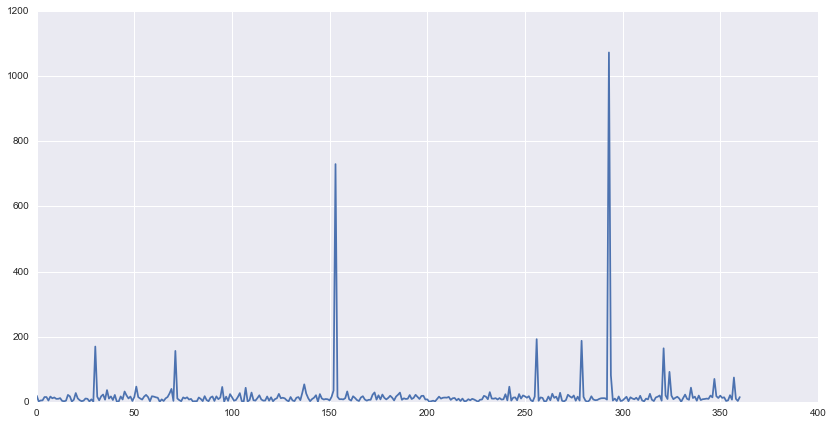

In [125]:
x = np.arange(0,361,1)
y = np.abs(pr - test_results)
fig=plt.figure(figsize=(14,7))
plt.plot(x,y)
plt.show()

Итак, мы видим два выброса, для которых мы очень плохо предсказываем. Уберем их.

In [137]:
data_ar = np.delete(data_ar,np.arange(150,160,1),0)
data_ar = np.delete(data_ar,np.arange(280,290,1),0)

In [138]:
len(data_ar)

497

In [140]:
# Оценим по новой.
p = int(len(data_ar) * 0.7)
np.random.shuffle(data_ar)
test_data = data_ar[:p]
train_data = data_ar[p:]
test_results = np.array(test_data[:,11].astype(float))
train_results = np.array(train_data[:,11].astype(float))
test_sample = np.array(np.hstack((test_data[:,:11], test_data[:,12:])).astype(float))
train_sample = np.array(np.hstack((train_data[:,:11], train_data[:,12:])).astype(float))
w = np.linalg.inv(train_sample.T.dot(train_sample)).dot(train_sample.T).dot(train_results.T)
MSerr = MSError(test_sample, test_results,w)
print(MSerr)

883.51815599


Так то лучше, а теперь c.

In [141]:
for c in range(1,1000,10):
    print(c)
    do_task_c(c)

1
Среднеквадратичная ошибка:  2.44326123204
Она же с обратным преобразованием:  598.58447782
11
Среднеквадратичная ошибка:  0.405046297702
Она же с обратным преобразованием:  586.36526792
21
Среднеквадратичная ошибка:  0.215341570663
Она же с обратным преобразованием:  592.724466534
31
Среднеквадратичная ошибка:  0.141804934712
Она же с обратным преобразованием:  600.945253584
41
Среднеквадратичная ошибка:  0.103088939544
Она же с обратным преобразованием:  609.441131531
51
Среднеквадратичная ошибка:  0.0794378580409
Она же с обратным преобразованием:  617.77181993
61
Среднеквадратичная ошибка:  0.0636354138929
Она же с обратным преобразованием:  625.785462058
71
Среднеквадратичная ошибка:  0.0524195012359
Она же с обратным преобразованием:  633.430872972
81
Среднеквадратичная ошибка:  0.0441032694526
Она же с обратным преобразованием:  640.698027148
91
Среднеквадратичная ошибка:  0.0377289072365
Она же с обратным преобразованием:  647.595037208
101
Среднеквадратичная ошибка:  0.032713

Наименьшая среднеквадратичная ошибка для обращенных значений достигается при меньших c.

### Вывод. Исходные данные были с выбросами, либо наша модель слишком слаба, чтобы хорошо предсказывать пожары. До обработки выбросов мы получали MSE около 4000 и это значение сильно зависило от разделения выборки на обучение и контроль. После очистки от выбросов мы получили значение MSE 800. С помощью приема с логарифмом удается понизить ошибку на 400 и 200, до  3600 и 600 соответственно. Также видно что при росте c, ошибка MSE для логарифмов уменьшается, а для нормальных значений немного растет.